In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output = 'pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# sns.set_theme('notebook')
# sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8)

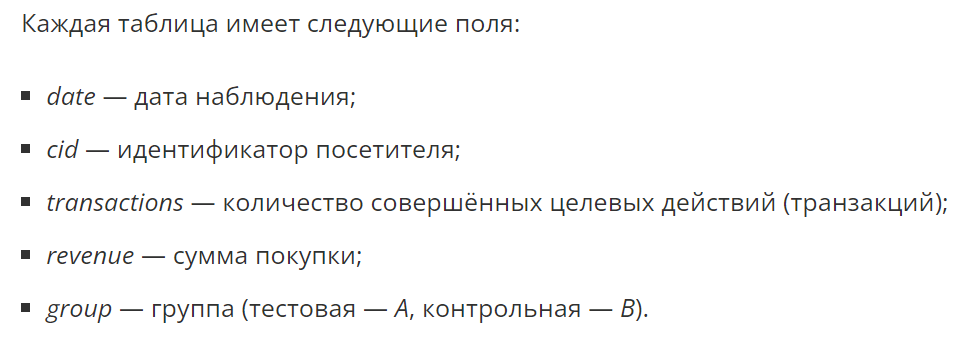

In [2]:
df_a = pd.read_csv('data/ab_test-redesign_sample_a.zip', parse_dates=['date'])
df_a

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A
...,...,...,...,...,...
61566,2020-11-23,9.986289e+08,0,0,A
61567,2020-11-23,9.989196e+08,0,0,A
61568,2020-11-23,9.990631e+08,0,0,A
61569,2020-11-23,9.994210e+07,0,0,A


In [3]:
df_b = pd.read_csv('data/ab_test-redesign_sample_b.zip', parse_dates=['date'])
df_b

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B
...,...,...,...,...,...
61378,2020-11-23,9.965675e+08,0,0,B
61379,2020-11-23,9.970803e+07,0,0,B
61380,2020-11-23,9.984814e+08,0,0,B
61381,2020-11-23,9.991118e+08,0,0,B


In [4]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61383 non-null  datetime64[ns]
 1   cid           61383 non-null  float64       
 2   transactions  61383 non-null  int64         
 3   revenue       61383 non-null  int64         
 4   group         61383 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


### Задание 4.6
Постройте таблицу со следующими ежедневными показателями:

количество посетителей сайта;
суммарное число транзакций;
общая сумма покупок (выручка).

In [6]:
df_a_daily = df_a.groupby('date').agg(
    {'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'}
).rename(columns={'cid': 'users'})
df_a_daily

,users,transactions,revenue
date,,,
2020-11-06,2576,16,1577279
2020-11-07,2704,23,1721886
2020-11-08,3354,25,846051
2020-11-09,3234,18,708830
2020-11-10,3022,29,826984
2020-11-11,3218,19,1209656
2020-11-12,3467,19,607839
2020-11-13,3676,36,1338816
2020-11-14,3372,30,2659277


In [7]:
df_b_daily = df_b.groupby('date').agg(
    {'cid': 'count', 'transactions': 'sum', 'revenue': 'sum'}
).rename(columns={'cid': 'users'})
df_b_daily

,users,transactions,revenue
date,,,
2020-11-06,2499,19,996645
2020-11-07,2804,19,555499
2020-11-08,3291,24,3044842
2020-11-09,3062,25,1285836
2020-11-10,3072,30,2414726
2020-11-11,3208,22,3555727
2020-11-12,3494,25,915653
2020-11-13,3606,37,1703475
2020-11-14,3276,34,2369998


### Задание 4.7
Добавьте в каждую из таблиц кумулятивные метрики:

кумулятивное количество посетителей сайта;
кумулятивное суммарное число транзакций;
кумулятивная общая сумма покупок (кумулятивная выручка).
Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [8]:
df_a_daily

,users,transactions,revenue
date,,,
2020-11-06,2576,16,1577279
2020-11-07,2704,23,1721886
2020-11-08,3354,25,846051
2020-11-09,3234,18,708830
2020-11-10,3022,29,826984
2020-11-11,3218,19,1209656
2020-11-12,3467,19,607839
2020-11-13,3676,36,1338816
2020-11-14,3372,30,2659277


In [13]:
df_a_daily['cum_users'] = df_a_daily['users'].cumsum()
df_a_daily['cum_transactions'] = df_a_daily['transactions'].cumsum()
df_a_daily['cum_revenue'] = df_a_daily['revenue'].cumsum()
df_a_daily['cum_conversion'] = df_a_daily['cum_transactions'] / df_a_daily['cum_users'] * 100
df_a_daily['cum_average_bill'] = df_a_daily['cum_revenue'] / df_a_daily['cum_transactions']

In [14]:
df_a_daily

,users,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_average_bill
date,,,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450
2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.276923
2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.671141
2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.410811
2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.641860


In [15]:
df_b_daily['cum_users'] = df_b_daily['users'].cumsum()
df_b_daily['cum_transactions'] = df_b_daily['transactions'].cumsum()
df_b_daily['cum_revenue'] = df_b_daily['revenue'].cumsum()
df_b_daily['cum_conversion'] = df_b_daily['cum_transactions'] / df_b_daily['cum_users'] * 100
df_b_daily['cum_average_bill'] = df_b_daily['cum_revenue'] / df_b_daily['cum_transactions']

In [16]:
df_b_daily

,users,transactions,revenue,cum_users,cum_transactions,cum_revenue,cum_conversion,cum_average_bill
date,,,,,,,,
2020-11-06,2499,19,996645,2499,19,996645,0.760304,52455.000000
2020-11-07,2804,19,555499,5303,38,1552144,0.716576,40845.894737
2020-11-08,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
2020-11-09,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
2020-11-10,3072,30,2414726,14728,117,8297548,0.794405,70919.213675
2020-11-11,3208,22,3555727,17936,139,11853275,0.774978,85275.359712
2020-11-12,3494,25,915653,21430,164,12768928,0.765282,77859.317073
2020-11-13,3606,37,1703475,25036,201,14472403,0.802844,72002.004975
2020-11-14,3276,34,2369998,28312,235,16842401,0.830037,71669.791489


### Задание 4.8
Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

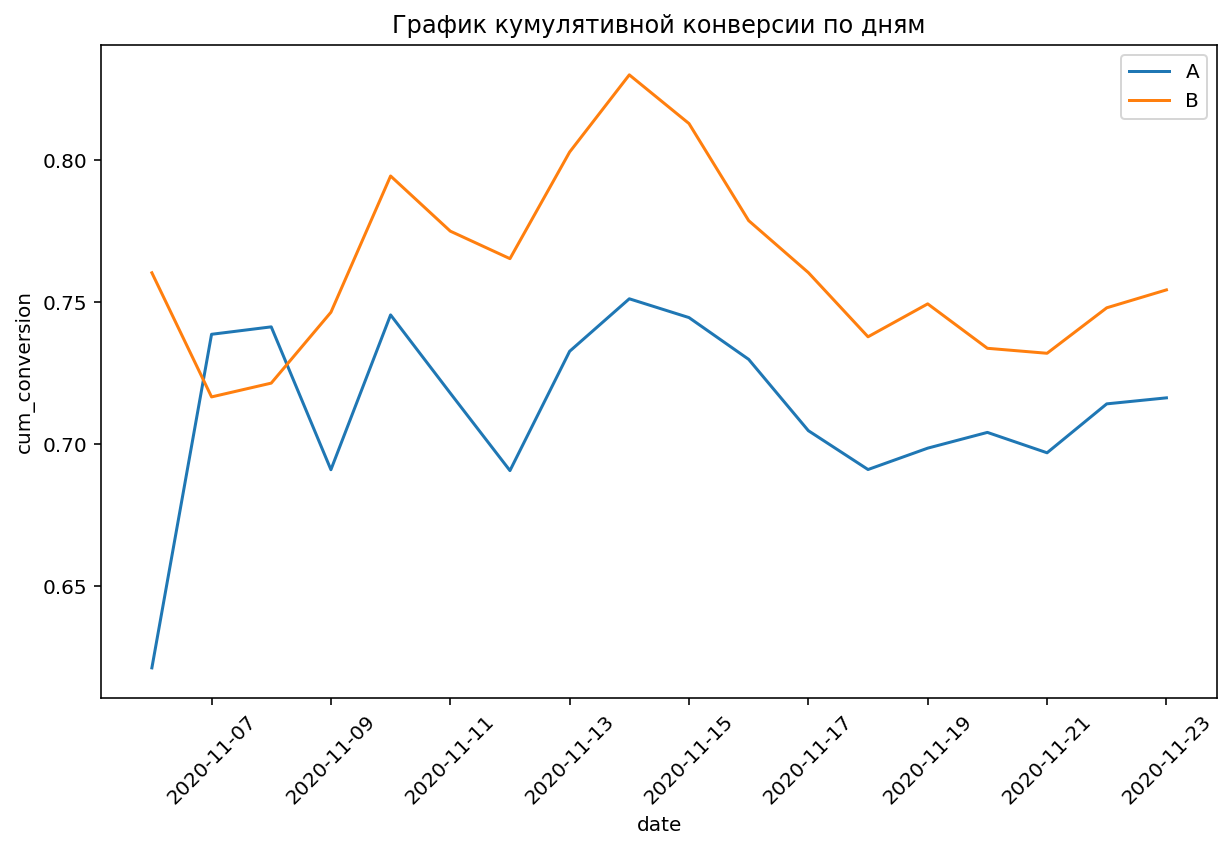

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_a_daily, x=df_a_daily.index, y='cum_conversion', ax=ax, label='A')
sns.lineplot(data=df_b_daily, x=df_b_daily.index, y='cum_conversion', ax=ax, label='B')
ax.set_title('График кумулятивной конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.legend()
plt.show()

### Задание 4.9
Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

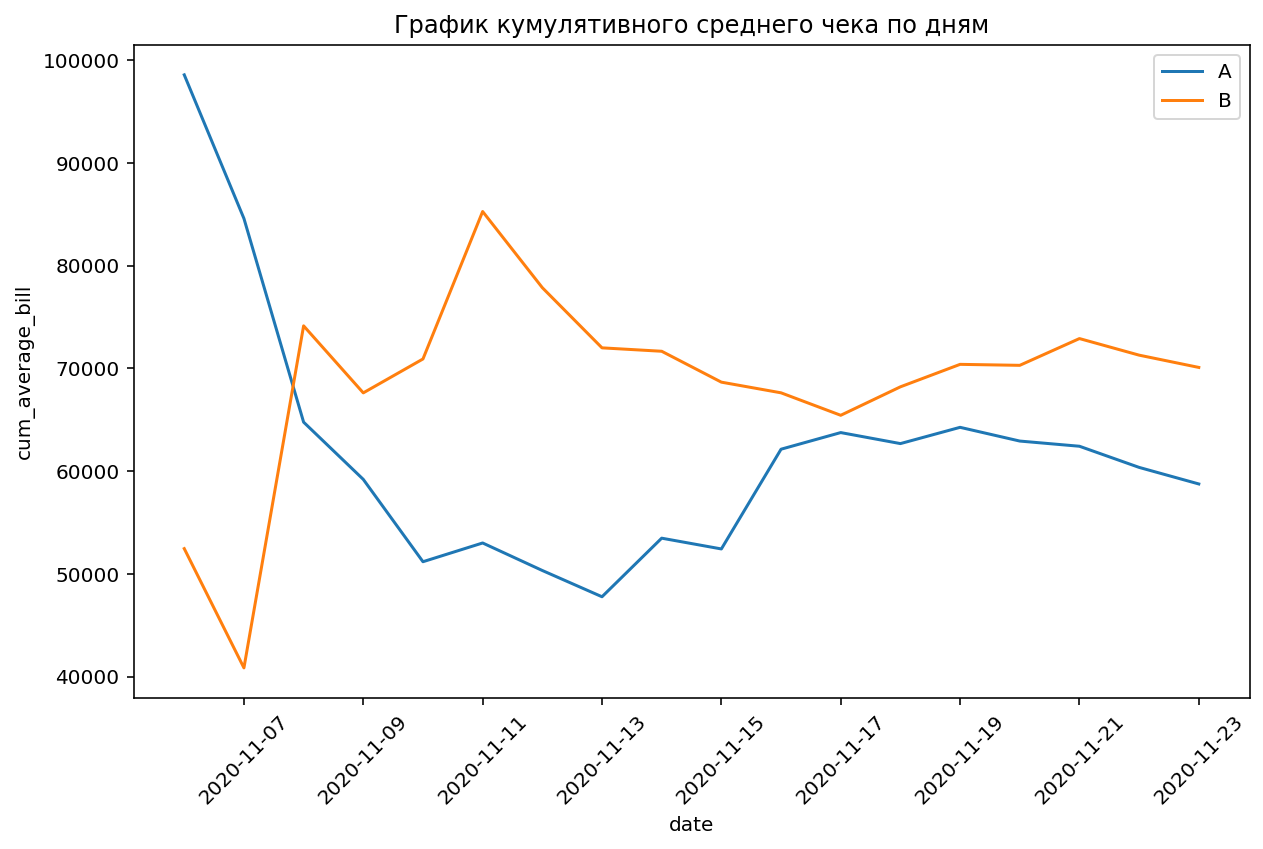

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_a_daily, x=df_a_daily.index, y='cum_average_bill', ax=ax, label='A')
sns.lineplot(data=df_b_daily, x=df_b_daily.index, y='cum_average_bill', ax=ax, label='B')
ax.set_title('График кумулятивного среднего чека по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.legend()
plt.show()